# Import Libraries

In [711]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 


from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans

from matplotlib.pyplot import cm

In [137]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA



# Call pickle

In [4]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors = pickle.load(f)

In [5]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [14]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

In [10]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Jersey Number  Joined  Loaned From  \
0        4.0          4.0          1           10.0    5297            0   
1        4.0          5.0          1            7.0     175            0   
2        5.0          5.0          1           10.0     516            0   
3        3.0          1.0          1            1.0    2741            0   
4        5.0          4.0          1            7.0    1220            0   

   Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  \
0                     3     170     159  88  88  88  92  93  93  93  92   93   
1                     4     188     183  91  91  91  89  90  90  90  89   88   
2                     4     175     150  84  84  84  89  89  89  89  89   89   
3                     2     193     168   0   0   0   0   0   0   0   0    0   
4                     5     180     154  82  82  82  87  87  87  87  87   88   

   CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47   
1   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53   
2   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47   
3    0    0   0    0   0    0   0    0    0    0    0    0   0    0   0    0   
4   88   88  88   87  87   87  88   77   77   77   77   77  73   66  66   66   

   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0  59      84.0       95.0             70.0          90.0     86.0       97.0   
1  61      84.0       94.0             89.0          81.0     87.0       88.0   
2  60      79.0       87.0             62.0          84.0     84.0       96.0   
3   0      17.0       13.0             21.0          50.0     13.0       18.0   
4  73      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  ...  Club_Reputation  Position_Potential  \
0   93.0        94.0         87.0  ...         2.242424                   2   
1   81.0        76.0         77.0  ...         2.520000                   3   
2   88.0        87.0         78.0  ...         2.233333                   3   
3   21.0        19.0         51.0  ...         2.090909                   0   
4   85.0        83.0         91.0  ...         2.090909                   3   

   Attacking  Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0       85.0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1       87.0   83.2      86.6   90.0  74.833333  27.333333         11.6   
2       79.2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3       22.8   30.2      61.6   43.4  42.666667  16.333333         88.8   
4       80.8   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0      

In [13]:
#Drop unimportant features for recommendation
predictors = predictors.drop(['Jersey Number','Loaned From', 'Joined','Contract Valid Until'], axis = 1)

In [15]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Club_Reputation  \
0          91.0         86.0     91.0  ...         2.242424   
1          89.0         91.0     87.0  ...         2.520000   
2          94.0         90.0     96.0  ...         2.233333   
3          57.0         58.0     60.0  ...         2.090909   
4          78.0         76.0     79.0  ...         2.090909   

   Position_Potential  Attacking  Skill  Movement  Power  Mentality  \
0                   2       85.0   93.4      91.6   75.6  71.500000   
1                   3       87.0   83.2      86.6   90.0  74.833333   
2                   3       79.2   88.8      91.6   70.6  73.833333   
3                   0       22.8   30.2      61.6   43.4  42.666667   
4                   3       80.8   87.2      80.2   82.0  80.833333   

   Defending  GoalKeeping  Potential_Difference  Body Type  Attack_WR  \
0  29.000000         10.8                     0          1          2   
1  27.333333         11.6                     0          2          3   
2  28.000000         11.8                     1          1          3   
3  16.333333         88.8                     2          1          2   
4  59.000000         11.2                     1          2          3   

   Defense_WR  Position_CAM  Position_CB  Position_CDM  Position_CF  \
0           2             0            0             0            0   
1           1             0            0             0            0   
2           2             0            0             0            0   
3           2             0            0             0            0   
4           3             0            0             0            0   

   Position_CM  

### Standardize the numeric columns

In [35]:
#Seperate the continuous/numeric columns from the indicator/dummy/ordinal columns

numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']

121

In [788]:
#Check that we have covered all the columns
len(predictors.columns) == len(numeric_cols) + len(non_numeric_cols)

True

In [38]:
#Create scaler
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(predictors[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
predictors_scaled = pd.concat([predictors_num,predictors[non_numeric_cols]], axis=1)

In [41]:
predictors_scaled.head()

Age   Overall  Potential   Special  International Reputation  \
0  1.258441  4.013364   3.697415  2.213984                  9.864420   
1  1.686666  4.013364   3.697415  2.309273                  9.864420   
2  0.187878  3.724114   3.534396  1.997752                  9.864420   
3  0.401990  3.579489   3.534396 -0.465097                  7.326477   
4  0.401990  3.579489   3.371377  2.503515                  7.326477   

   Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
0   1.593944     2.167171 -1.670713 -0.447583  1.818665  1.818665  1.818665   
1   1.593944     3.489672  1.019186  1.091577  1.967451  1.967451  1.967451   
2   3.108090     3.489672 -0.923519 -1.024769  1.620283  1.620283  1.620283   
3   0.079797    -1.800331  1.766380  0.129602 -2.545731 -2.545731 -2.545731   
4   3.108090     2.167171 -0.176325 -0.768242  1.521092  1.521092  1.521092   

         LW        LF        CF        RF        RW       LAM       CAM  \
0  1.901392  1.973099  1.973099  1.973099  1.901392  1.957564  1.957564   
1  1.757292  1.828258  1.828258  1.828258  1.757292  1.716682  1.716682   
2  1.757292  1.779978  1.779978  1.779978  1.757292  1.764859  1.764859   
3 -2.517663 -2.516977 -2.516977 -2.516977 -2.517663 -2.522831 -2.522831   
4  1.661226  1.683417  1.683417  1.683417  1.661226  1.716682  1.716682   

        RAM        LM       LCM        CM       RCM        RM       LWB  \
0  1.957564  1.828702  1.603458  1.603458  1.603458  1.828702  0.646400   
1  1.716682  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
2  1.764859  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
3 -2.522831 -2.554472 -2.565223 -2.565223 -2.565223 -2.554472 -2.551047   
4  1.716682  1.684202  1.752340  1.752340  1.752340  1.684202  1.295881   

        LDM       CDM       RDM       RWB        LB       LCB        CB  \
0  0.519988  0.519988  0.519988  0.646400  0.427328 -0.114632 -0.114632   
1  0.519988  0.519988  0.519988  0.696360  0.527106  0.174842  0.174842   
2  0.470696  0.470696  0.470696  0.696360  0.477217 -0.114632 -0.114632   
3 -2.486788 -2.486788 -2.486788 -2.551047 -2.516127 -2.382176 -2.382176   
4  1.308650  1.308650  1.308650  1.295881  1.125774  0.802035  0.802035   

        RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0 -0.114632  0.427328  1.865922   2.532567         1.018552      2.130287   
1  0.174842  0.527106  1.865922   2.481351         2.111799      1.518005   
2 -0.114632  0.477217  1.593650   2.122842         0.558238      1.722099   
3 -2.382176 -2.516127 -1.782517  -1.667116        -1.800873     -0.590969   
4  0.802035  1.125774  2.356010   1.866764         0.155463      2.266350   

    Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
0  2.435355   2.201445  2.491426    2.925736     2.237037     2.255198   
1  2.491871   1.725503  1.839066    1.895887     1.584613     2.135338   
2  2.322322   2.148563  2.219609    2.525239     1.649855     2.195268   
3 -1.690356  -1.976272 -1.422733   -1.365303    -0.111691    -0.981022   
4  2.209288   1.619738  2.056519    2.296384     2.498007     1.955548   

   Acceleration  SprintSpeed   Agility  Reactions   Balance  ...  Attacking  \
0      1.767621     1.452129  1.862187   3.680643  2.195382  ...   2.367037   
1      1.633639     1.793436  1.591288   3.791628  0.426820  ...   2.501665   
2      1.968594     1.725175  2.200811   3.569658  1.417214  ...   1.976617   
3     -0.510075    -0.459193 -0.237281   3.125717 -1.483228  ...  -1.819883   
4      0.896737     0.769514  1.049490   3.236703  0.922017  ...   2.084319   

      Skill  Movement     Power  Mentality  Defending  GoalKeeping  \
0  2.652691  2.491225  1.477531   1.581089  -0.874941    -0.333393   
1  2.010038  2.044295  2.777910   1.853981  -0.956497    -0.286336   
2  2.362867  2.491225  1.026010   1.772114  -0.923875    -0.274572   
3 -1.329238 -0.190353 -1.430261  -0.779428  -1.494763     4.254638   
4  2.262059  1

# Function for filtering for specific Overall & Position

Function = filter_players(position, ovr_min = 0, ovr_max= 100) 
- Accepts a position name and overall range and returns a filtered dataframe of the players that meet those criteria. For positions with few players (LS,RS, etc.) it also returns players from the most similar position (so its not as limited).

In [746]:
def filter_players(position, ovr_min = 0, ovr_max= 100):
    if str(position) == 'RF':
        indices = list(fifa[(fifa['Position'].isin(['RF','RS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LF':
        indices = list(fifa[(fifa['Position'].isin(['LF','LS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LAM':
        indices = list(fifa[(fifa['Position'].isin(['LAM','LM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'RAM':
        indices = list(fifa[(fifa['Position'].isin(['RAM','RM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    else:
        indices = list(fifa[(fifa['Position'] == position) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    global filtered_df
    global filtered_names
    global filtered_df
    
    filtered_df = predictors.iloc[indices,:]
    #filtered_df_scaled = predictors_scaled.iloc[indices,:]
    
    filtered_list = list(fifa.iloc[indices,:].ID)
    
    filtered_names = fifa.Name[fifa.ID.isin(filtered_list)]
    
    return filtered_list, filtered_names , filtered_df
    

In [784]:
posit = input("Enter the position looking for: \n")
over_min = input("What is the min overall?: \n")
over_max = input("What is the max overall?: \n")

filtered_players = filter_players(str(posit), int(over_min), int(over_max))

print("Here are the filtered players based on your criteriea:")# + ('\n'*2))
display(list(filtered_players[1]))


print("Here are the filtered players' features based on your criteriea: ")
filtered_players[2]

Enter the position looking for: 
CM
What is the min overall?: 
74
What is the max overall?: 
86
Here are the filtered players based on your criteriea:


['Thiago',
 'S. Milinković-Savić',
 'Jorginho',
 'I. Gündoğan',
 'N. Keïta',
 'C. Tolisso',
 'A. Rabiot',
 'L. Goretzka',
 'J. Draxler',
 'Cesc Fàbregas',
 'M. Dembélé',
 'Rodri',
 'Fred',
 'G. Kondogbia',
 'M. Götze',
 'G. Bonaventura',
 'A. Guardado',
 'Ander Herrera',
 'K. Boateng',
 'H. Herrera',
 'J. Milner',
 'T. Ndombele',
 'M. Dahoud',
 'E. Can',
 'L. Paredes',
 'A. Oxlade-Chamberlain',
 'Bruno',
 'A. Lallana',
 'F. Kessié',
 'R. Battaglia',
 'Denis Suárez',
 'M. van Ginkel',
 'Sérgio Oliveira',
 'J. Wilshere',
 'D. Drinkwater',
 'Adrien Silva',
 'M. Fellaini',
 'E. Belözoğlu',
 'L. Pellegrini',
 'S. Lobotka',
 'Y. Tielemans',
 'N. Bentaleb',
 'Óliver Torres',
 'Andreas Pereira',
 'B. Cristante',
 'L. Castro',
 'A. Trebel',
 'V. Darida',
 'P. Hernández',
 'B. Natcho',
 'Z. Junuzović',
 'J. Shelvey',
 'G. Castro',
 'Gabriel',
 'T. Vilhena',
 'S. Sydorchuk',
 'V. Odjidja-Ofoe',
 'L. Cook',
 'P. Pérez',
 'Mikel San José',
 'A. Bertolacci',
 'D. Garmash',
 'T. Rincón',
 'M. Sissoko

Here are the filtered players' features based on your criteriea: 


Age  Overall  Potential  Special  Preferred Foot  \
67     27       86         86     2190               1   
78     23       85         90     2206               1   
121    26       84         87     2136               1   
136    27       84         84     2138               1   
161    23       83         88     2082               1   
162    23       83         88     2207               1   
168    23       83         87     2184               0   
169    23       83         88     2203               1   
184    24       83         86     2112               1   
219    31       83         83     2040               1   
220    30       83         83     2177               0   
227    22       82         87     2055               1   
250    25       82         84     2180               0   
262    25       82         85     2171               0   
280    26       82         85     2101               1   
284    28       82         82     2207               1   
306    31       82         82     2146               0   
374    28       81         81     2170               1   
391    31       81         81     2168               1   
406    28       81         81     2106               1   
409    32       81         81     2126               1   
414    21       80         89     2096               1   
435    22       80         86     2052               1   
448    24       80         85     2153               1   
452    24       80         85     2122               1   
481    24       80         85     2125               1   
513    34       80         80     1967               0   
515    30       80         80     2086               1   
562    21       79         88     2149               1   
587    26       79         80     2030               1   
613    24       79         86     2016               1   
641    25       79         80     2102               1   
651    26       79         82     2049               1   
671    26       79         81     2050               0   
681    28       79         79     2023               1   
685    29       79         79     2083               1   
700    30       79         79     1994               1   
725    37       79         79     2047               0   
746    22       78         84     2027               1   
774    23       78         84     1954               1   
775    21       78         87     2088               1   
791    23       78         83     2044               0   
804    23       78         83     1977               1   
807    22       78         84     2100               1   
809    23       78         86     1944               1   
820    29       78         78     2060               1   
829    27       78         79     2106               0   
836    27       78         78     2083               1   
843    31       78         78     2022               0   
848    30       78         78     2078               1   
...   ...      ...        ...      ...             ...   
1630   26       75         77     2060               1   
1631   20       75         81     1971               1   
1640   30       75         75     1989               0   
1687   23       75         83     1939               1   
1700   27       75         75     2102               1   
1712   30       75         75     2018               1   
1714   24       75         79     2044               0   
1716   27       75         75     2120               1   
1757   32       75         75     1966               1   
1761   22       75         81     1988               1   
1773   28       75         75     1960               1   
1809   20       75         84     2102               1   
1814   20       75         84     1927               1   
1854   31       75         75     2039               0   
1876   28       75         75     1991               0   
1880   25       75         78     2093               1   
1885   21       75         83     1933               1   
1894

# Similar Player Recommendation

## Recommending K nearest players function

Function = recommended_k_players_df(player, k_players = 100) 
-  Accepts a player's name and number of players to recommend and returns a dataframe of the recommended players and a list of their IDs. The recommendations are limited to players from the same position group.

In [785]:
def recommended_k_players_df(player, k_players = 100):
    #Find players' position group
    pos_group = list(fifa.Position_Group[fifa['Name']==player])[0]
    
    #Filter df for that position group
    if pos_group == 'Forward':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Midfielder':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Defender':
        indices = list(fifa[fifa.Position_Group == 'Defender'].index.values)
    elif pos_group == 'GoalKeeper':
        indices = list(fifa[fifa.Position_Group == 'GoalKeeper'].index.values)
    
    predictors_scaled_subset = predictors_scaled.iloc[indices,:]
    predictors_subset = predictors.iloc[indices,:]
    
    #Fit KNN for the k_players within that position group
    recommendations2 = NearestNeighbors(n_neighbors=k_players, algorithm='ball_tree').fit(predictors_scaled_subset)

    #Pass the player name from the dataset to the function and get 5 similar players as output
    player_indices2 = recommendations2.kneighbors(predictors_scaled_subset)[1]
    
    #Get player index
    fifa_subset = fifa.iloc[indices,:]
    index = fifa_subset[fifa_subset['Name']==player].index.tolist()[0]
    
    #Make variables global
    global recommend_list
    global recommended_df
    global recommended_names
    
    #Create recommended name list
    recommend_list = []
    #for i in player_indices2[index][1:]:
    #        recommend_list.append(fifa_subset.iloc[i]['Name'])
    
    
    #Get filtered df of recommended players
    recommended_df = predictors_subset.iloc[list(player_indices2[index][:]),:]
    recommend_list = list(fifa_subset.iloc[list(player_indices2[index][:]),:].ID)
    #recommend_list.insert(0, index)
    
    recommended_names = fifa.Name[fifa.ID.isin(recommend_list)]
    
    return recommend_list, recommended_names,recommended_df



In [787]:
player = str(input("Enter the player you are looking for: \n"))
num_of_players = input("Enter the number of similar players you are looking for: \n")


recommendation = recommended_k_players_df(player, (int(num_of_players)+1))
print("Here are {0} players similar to ".format(int(num_of_players)) +  player + ': \n \n' + str(recommendation[1][1:]))
print("\n Here are the players' features ")
display(recommendation[2].set_index(pd.Index(fifa.Name[list(recommendation[0][:])].values)))
#except:
#    print('\n Please enter a valid name (ex. L. Messi) and number of players less than 18159.')



Enter the player you are looking for: 
E. Hazard
Enter the number of similar players you are looking for: 
200
Here are 200 players similar to E. Hazard: 
 
2                   Neymar Jr
4                K. De Bruyne
5                   E. Hazard
6                   L. Modrić
7                   L. Suárez
10             R. Lewandowski
11                   T. Kroos
13                David Silva
14                   N. Kanté
15                  P. Dybala
16                    H. Kane
17               A. Griezmann
20            Sergio Busquets
21                  E. Cavani
23                  S. Agüero
25                  K. Mbappé
26                   M. Salah
28               J. Rodríguez
29                 L. Insigne
30                       Isco
31                 C. Eriksen
32                   Coutinho
36                    G. Bale
45                   P. Pogba
50                 D. Mertens
52                  M. Hamšík
53                 I. Rakitić
56             Bernardo Silva
58 

Age  Overall  Potential  Special  Preferred Foot  \
L. Modrić         32       91         91     2280               1   
K. De Bruyne      27       91         92     2281               1   
G. Wijnaldum      27       82         82     2175               1   
M. Götze          26       82         85     2101               1   
Coutinho          26       88         89     2175               1   
Koke              26       85         86     2175               1   
Thiago            27       86         86     2190               1   
I. Rakitić        30       87         87     2184               1   
G. Bonaventura    28       82         82     2207               1   
Ander Herrera     28       81         81     2170               1   
I. Gündoğan       27       84         84     2138               1   
M. Reus           29       86         86     2172               1   
Isco              26       88         91     2137               1   
Roberto Firmino   26       86         87     2187               1   
M. Kovačić        24       83         89     2115               1   
David Silva       32       90         90     2115               0   
A. Griezmann      27       89         90     2246               0   
M. Pjanić         28       86         86     2182               1   
Pizzi             28       83         83     2149               1   
M. Hamšík         30       87         87     2188               1   
M. Verratti       25       86         89     2149               1   
A. Ramsey         27       82         83     2110               1   
A. Lallana        30       80         80     2086               1   
R. Nainggolan     30       85         85     2278               1   
E. Banega         30       84         84     2133               1   
Fernandinho       33       86         86     2183               1   
C. Eriksen        26       88         91     2117               1   
T. Lemar          22       83         89     2173               0   
Saúl              23       85         90     2196               0   
J. Cuadrado       30       84         84     2163               1   
T. Kroos          28       90         90     2190               1   
H. Mkhitaryan     29       83         83     2100               1   
João Mário        25       81         84     2055               1   
R. Guerreiro      24       81         86     2146               0   
A. Sánchez        29       85         85     2172               1   
L. Goretzka       23       83         88     2203               1   
D. Alli           22       84         90     2189               1   
Borja Valero      33       81         81     2039               1   
T. Müller         28       86         86     2097               1   
L. Biglia         32       82         82     2104               1   
A. Di María       30       84         84     2113               0   
Iniesta           34       86         86     2058               1   
M. Salah          26       88         89     2146               0   
Willian           29       84         84     2052               1   
J. Rodríguez      26       88         89     2171               0   
E. Hazard         27       91         91     2142               1   
João Moutinho     31       81         81     2164               1   
P. Zieliński      24       81         88     2075               1   
I. Perišić        29       85         85     2199               1   
A. Vidal          31       85         85     2230               1   
...              ...      ...        ...      ...             ...   
Iago Falqué       28       80         80     1951               0   
André Gomes       24       80         85     2065               1   
M. Parolo         33       82         82     2151               1   
S. Verdi          25       81         81     2053               0   
L. Suárez         31       91         91     2346               1   
M. van Ginkel     25       79         80     2102               1   
K. Gameiro     

In [777]:
recommend_list

[0, 2, 5, 23, 68, 28, 1, 17, 93, 13, 15]

In [448]:
#recommended_df.Position_GK.sum() #Checking that no GKs were recommended in the DF
#fifa[fifa.ID.isin(recommend_list)].Position.unique() #Checking that no GKs were recommended in the list of IDs

0

## Visualizing Recommended Players

In [779]:
rador_variables = ['Age','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                 'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                 'Acceleration','SprintSpeed','Agility','Reactions','Balance',
                 'ShotPower','Jumping','Stamina','Strength','LongShots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties',
                 'Composure','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [741]:
def SkillChart(graph, abilities, player_name):
    len1 = graph.shape[0]
    len2 = graph.shape[1]
    temp = graph.values.reshape((len1, len2))
    
    tmp = pd.DataFrame(temp, columns = abilities)
    Attributes =list(tmp)
    AttNo = len(Attributes)
    
    plt.figure(figsize=(15,15))
    ax = plt.subplot(111, polar=True)
    
    #colors = ['black', 'blue', 'red', 'green', 'gold', 'pink', 'lightskyblue', 'orange', 'purple', 'yellow']
    color=iter(cm.tab20(np.linspace(0,1,len1)))
    
    for i in range(len1):
        c=next(color)
        values = tmp.iloc[i].tolist() #
        values += values [:1]
    
        angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
        angles += angles [:1]
        
        plt.xticks(angles[:-1],Attributes)
        ax.plot(angles, values, color = c)
        ax.fill(angles, values, c, alpha=0.1)
        plt.figtext(0.8, 0.2, ("Recommended Players for "+player_name[0]), color = 'black', fontsize=12)
        plt.figtext(0.8, 0.18-0.022*i, player_name[i], color = c, fontsize=12)
    
    plt.show()

In [742]:
standard_player = predictors[rador_variables][fifa.ID.isin(recommend_list)]
standard_player = standard_player.set_index(pd.Index(fifa.Name[standard_player.index].values))
standard_player = standard_player.loc[list(recommended_names),:]

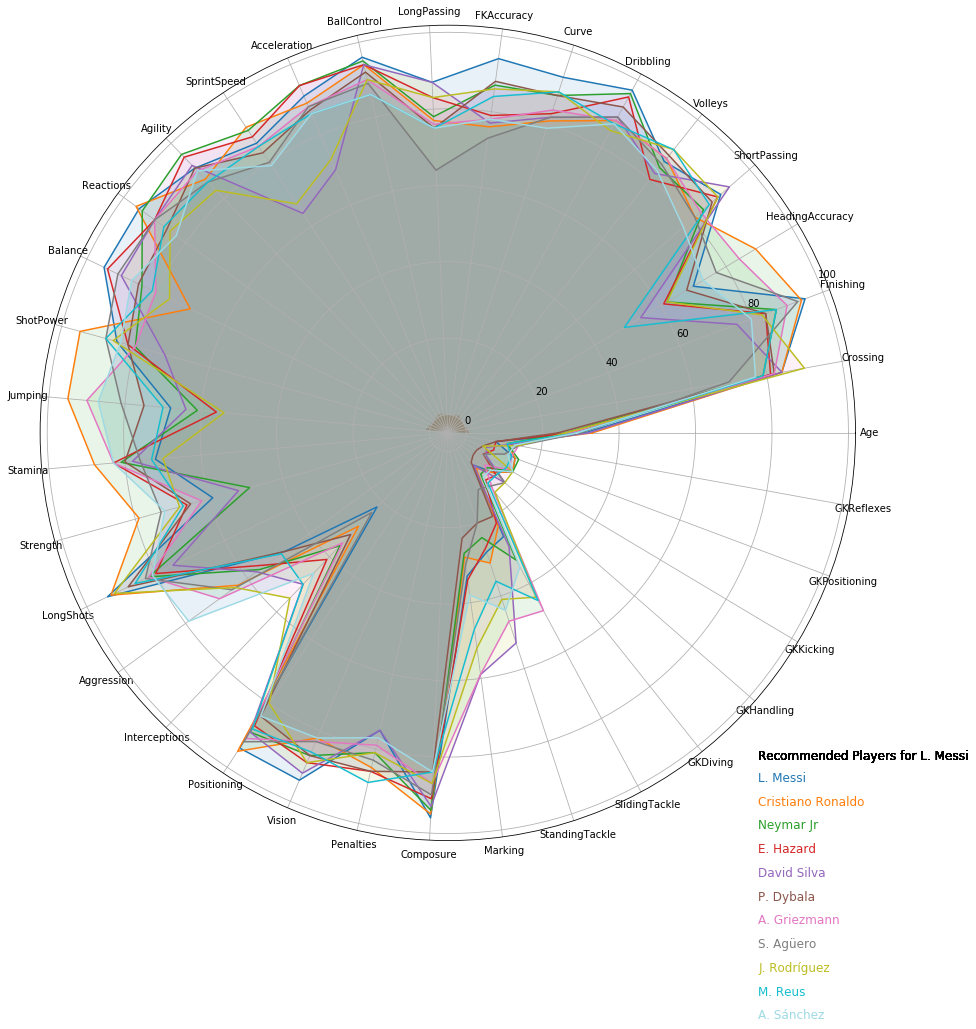

In [743]:
SkillChart(graph= standard_player, 
           abilities = rador_variables, 
           player_name = pd.Series(standard_player.index).values)

# Clustering Visualizations

### Visualizing TSNE with points colored by Value bins (y_binned_quantile)

In [349]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(fifa.Value,5, labels=[1,2,3,4,5])

In [350]:
from sklearn.manifold import TSNE

#scaled = StandardScaler()
#X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(predictors_scaled)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y_binned_quantile
dftsne.columns = ['x1','x2','cluster']



Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

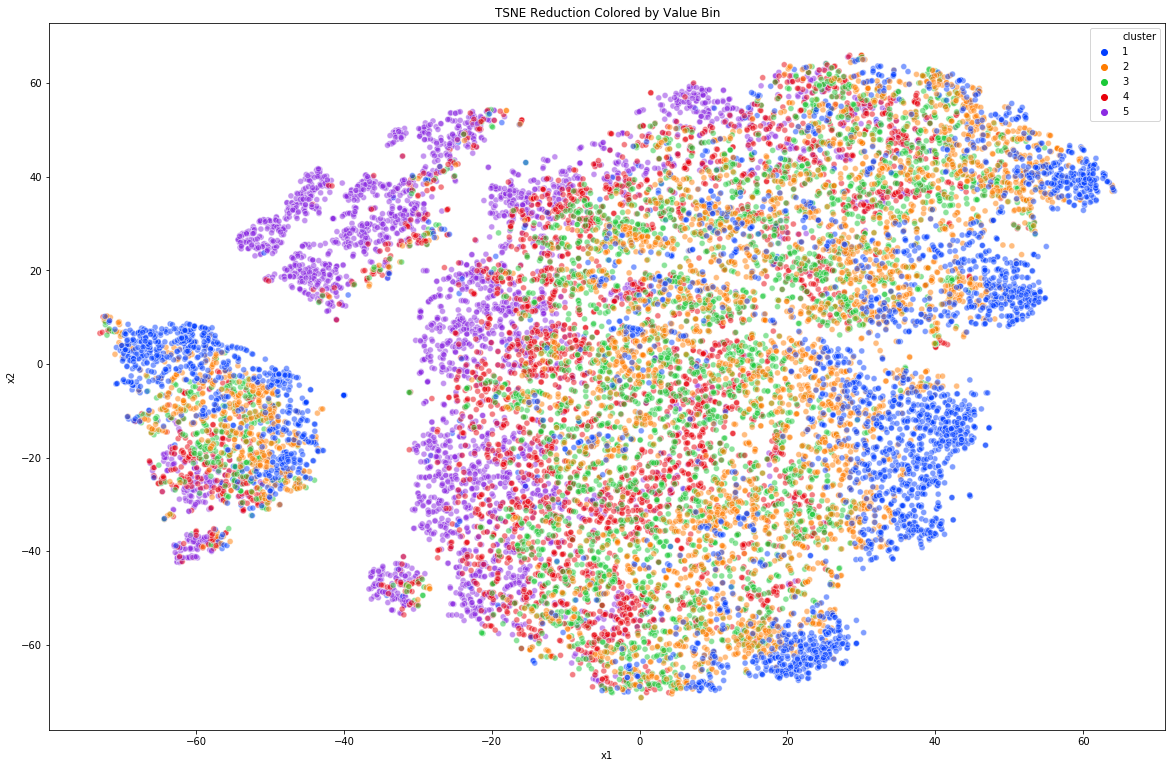

In [351]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')



### Let's try coloring TSNE using position group

In [352]:
dftsne['Position_Group_Labels'] = fifa.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

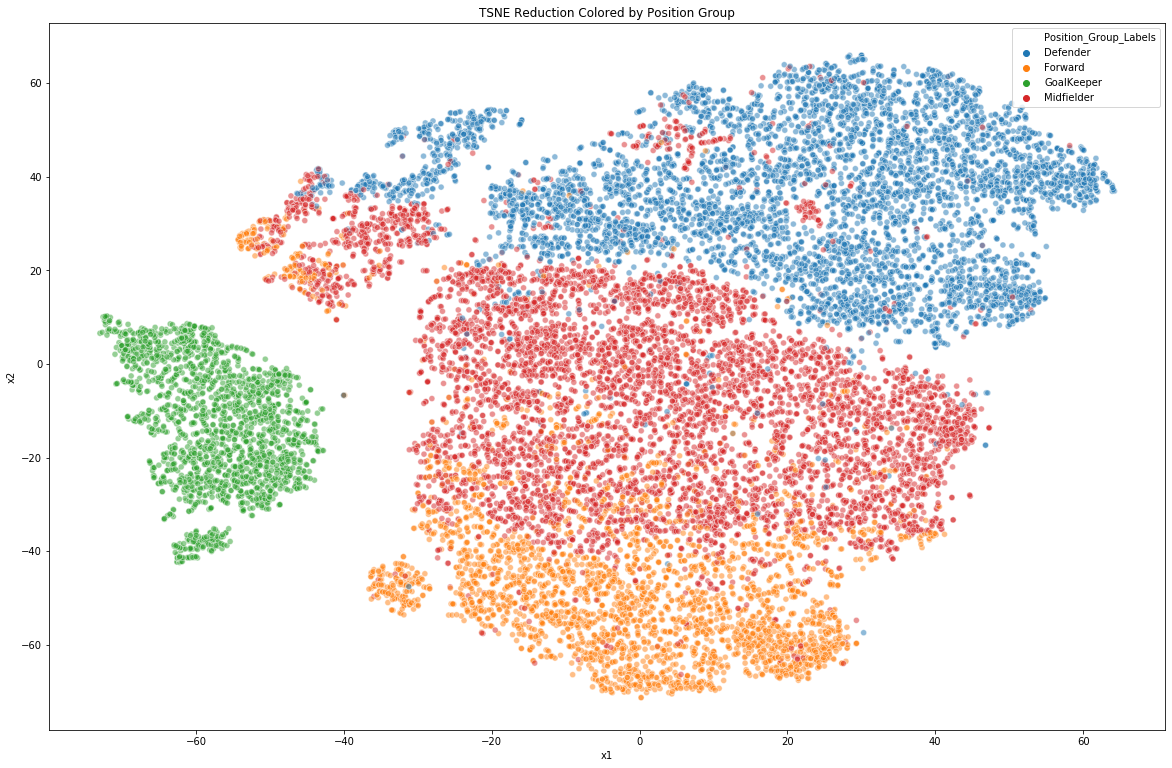

In [353]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')


### Try by Continent

Text(0.5, 1.0, 'TSNE Reduction Colored by Continent')

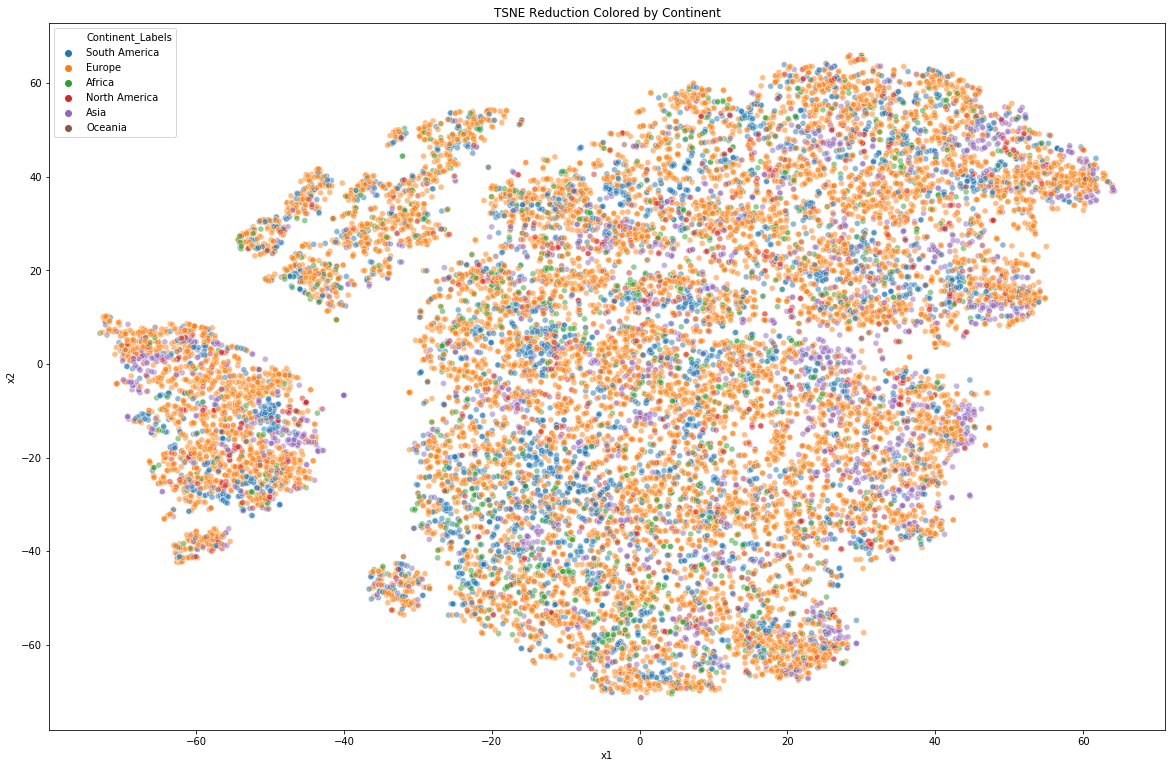

In [354]:
dftsne['Continent_Labels'] = fifa.Continent

fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Continent_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Continent')

In [372]:
dftsne['Value'] = fifa.Value

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Continuous')

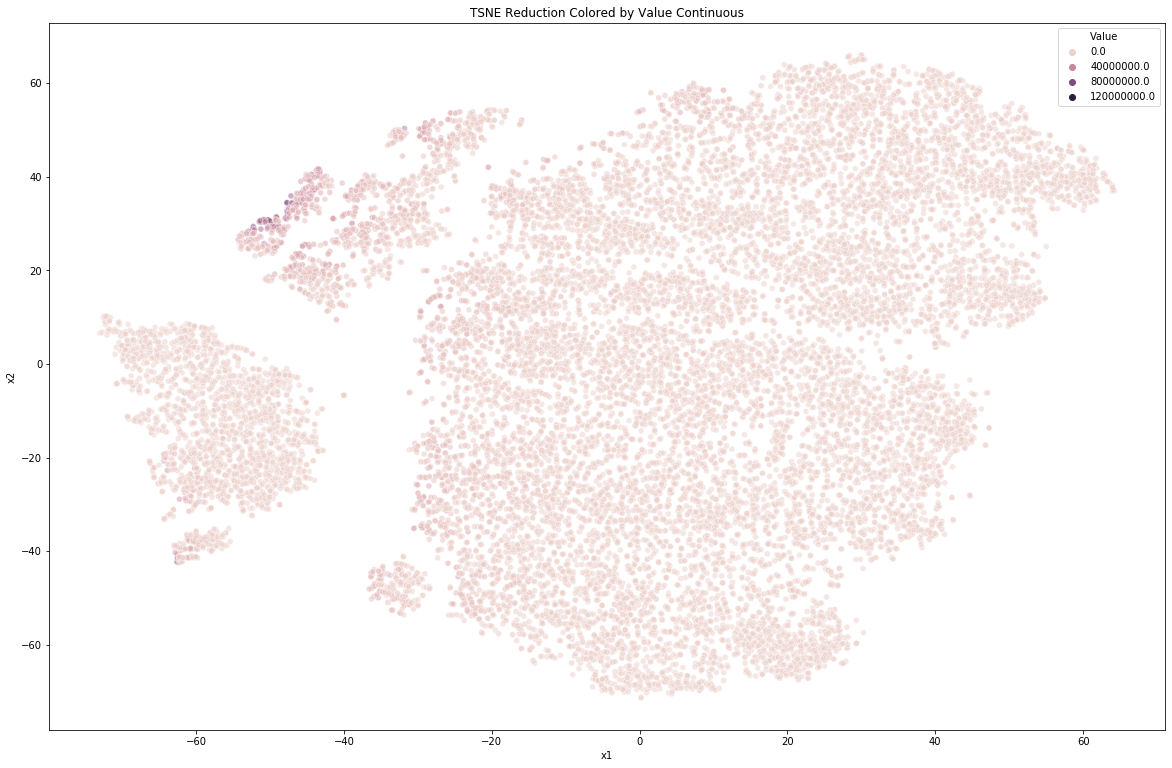

In [453]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", fifa.Value.nunique() )
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Value',alpha=0.5 ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Continuous')




Text(0.5, 1.0, 'TSNE Reduction Colored by Value Continuous')

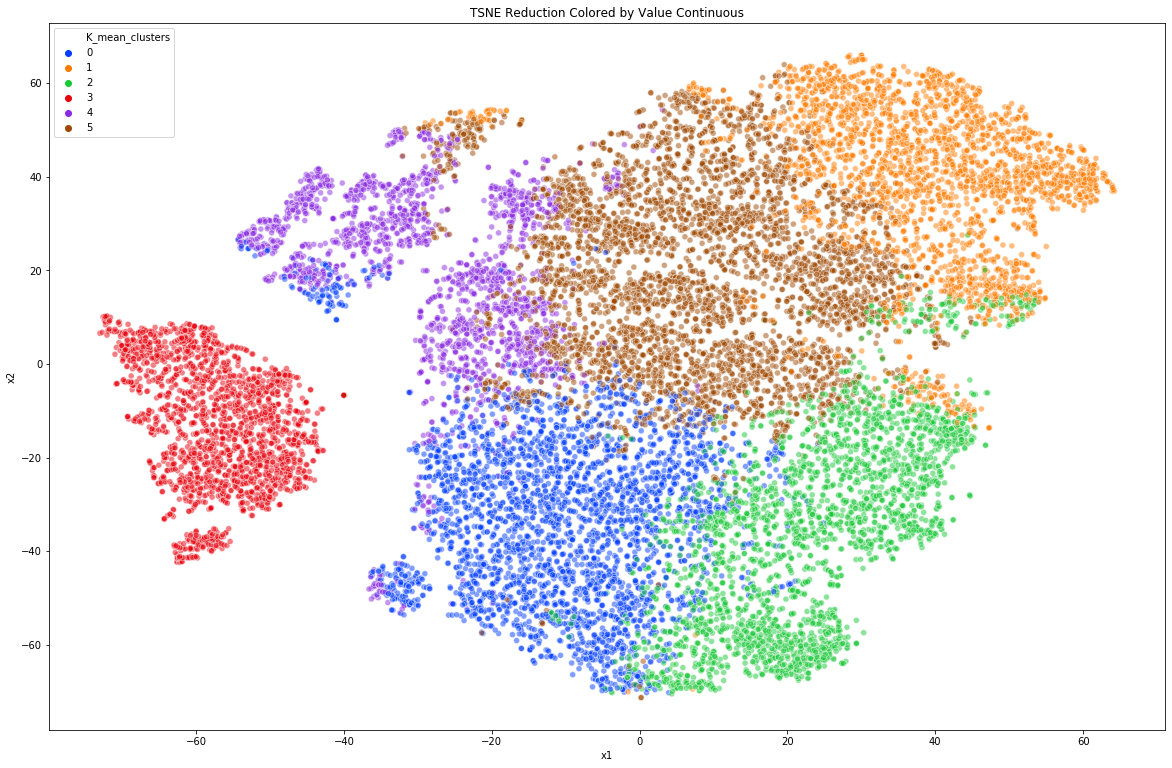

In [764]:
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(predictors_scaled)

dftsne['K_mean_clusters'] = clustering_ori

fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 6 )
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='K_mean_clusters',alpha=0.5 ,ax=ax, legend = 'full', palette=cmap)
ax.set_title('TSNE Reduction Colored by Value Continuous')



In [795]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type',
       'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositio

In [ ]:
dftsne['Club'] = clustering_ori

fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 6 )
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='K_mean_clusters',alpha=0.5 ,ax=ax, legend = 'full', palette=cmap)
ax.set_title('TSNE Reduction Colored by Value Continuous')




# K-Mean clustering analysis of clusters

In [355]:
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(predictors_scaled)

In [383]:
predictors_w_cluster = predictors.copy()
predictors_w_cluster['cluster'] = clustering_ori

In [384]:
predictors_w_cluster.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Position_Potential  Attacking  \
0          91.0         86.0     91.0  ...                   2       85.0   
1          89.0         91.0     87.0  ...                   3       87.0   
2          94.0         90.0     96.0  ...                   3       79.2   
3          57.0         58.0     60.0  ...                   0       22.8   
4          78.0         76.0     79.0  ...                   3       80.8   

   Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1   83.2      86.6   90.0  74.833333  27.333333         11.6   
2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3   30.2      61.6   43.4  42.666667  16.333333         88.8   
4   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0             0            0            0            0   
3            0             0            0            0            1   
4            0             0      

In [385]:
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
    feature_list = predictors_w_cluster.columns[:-38]
    
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []
    
    for i,varname in enumerate(feature_list):
        #     get overall mean for a variable, set lower and upper limit
        mean_overall = df[varname].mean()
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)
        
        #     get cluster mean for a variable
        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()
        
        
        #     create filter to display graph with 0.5 deviation from the mean
        if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
            plot_list.append(varname)
            mean_overall_std = mean_overall/mean_overall
            mean_cluster_std = mean_cluster/mean_overall
            mean_overall_list.append(mean_overall_std)
            mean_cluster_list.append(mean_cluster_std)
            
    mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
    
    return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
    
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
    
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)
        
        
        for i,p in enumerate(ax.patches):
            ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
    ax.set_title('Unique Characteristics of Cluster ' + str(label))
    ax.set_xlabel('Standardized Mean')
    ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
    
    label = np.arange(n_clusters)
    
    for i in label:
        plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
    
    plt.tight_layout()
    

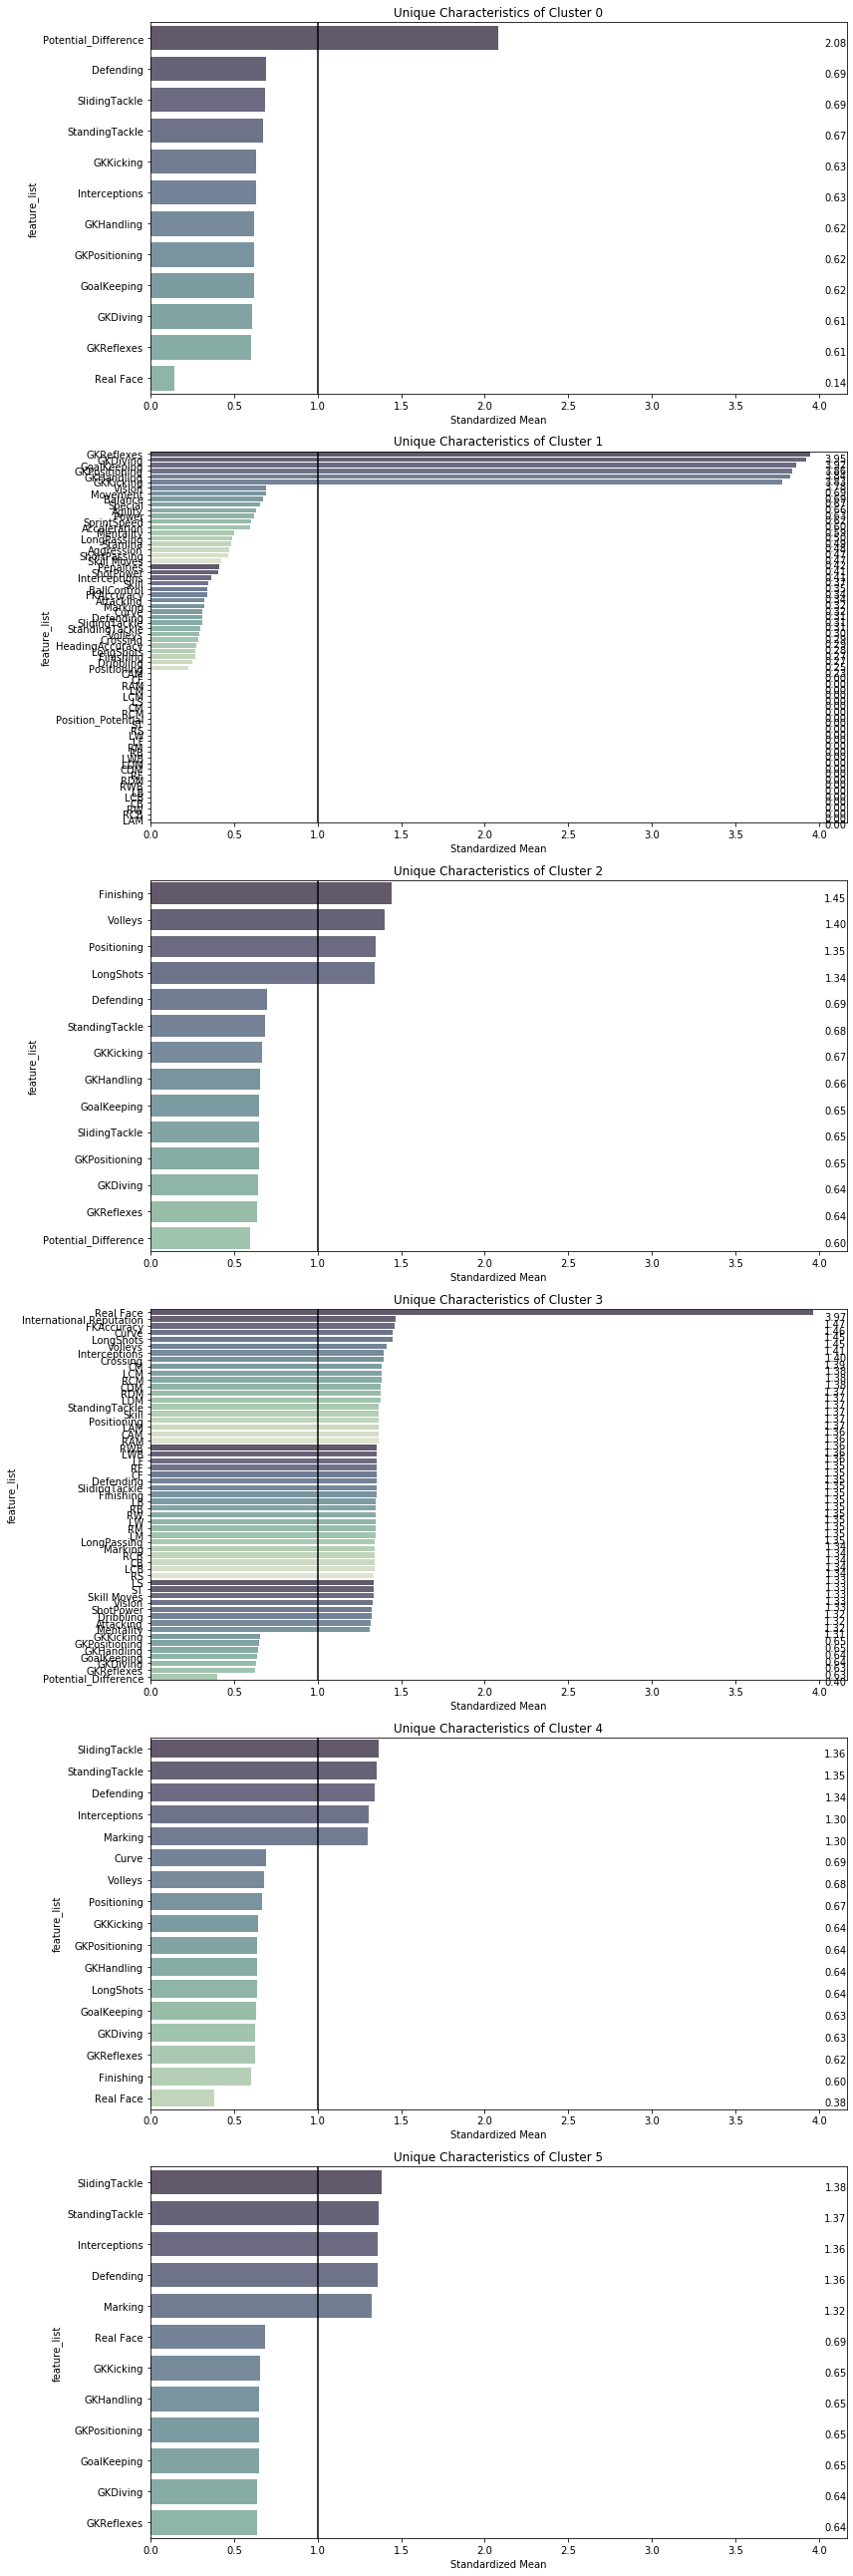

In [387]:
plot_features_all_cluster(df=predictors_w_cluster, label_col='cluster', n_clusters=6, sensitivity=0.3)

In [789]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

# APPENDIX

## Defining an Undervalued Player

In [0]:
#Average time player stays at a team
#avg_stay = (fifa.Joined.mean()/365)*12
#avg_stay

23.415377860859216

In [0]:
#scaled = StandardScaler()

#Average Overall/Potential

#scaled_avg_overpot = scaled.fit_transform(np.array(avg_over_pot).reshape(-1,1))

#Scale Wage & Value
#scaled_wage = scaled.fit_transform(np.array(fifa.Wage).reshape(-1,1))
#scaled_value = scaled.fit_transform(np.array(fifa.Value).reshape(-1,1))

#Average of scaled
#scaled_avg_wagevalue = (scaled_wage+scaled_value)/2


#undervalued_score = scaled_avg_overpot/scaled_avg_wagevalue


#avg_over_pot = (fifa.Overall+fifa.Potential)/2

#avg_value_age = (fifa.Value+(fifa.Wage*avg_stay))/2

#undervalued_score = avg_over_pot/avg_value_age

#maxx = undervalued_score[undervalued_score != np.inf].max()
#undervalued_score.replace(np.inf,maxx,inplace=True)

#undervalued_score_scaled = scaled.fit_transform(np.array(undervalued_score).reshape(-1,1))

In [0]:
#fifa['undervalued_score'] = undervalued_score_scaled

In [0]:
#fifa.sort_values(by = 'undervalued_score', ascending = True).head()

ID          Name  Age Nationality  Overall  Potential  \
2    2     Neymar Jr   26      Brazil       92         93   
0    0      L. Messi   31   Argentina       94         94   
4    4  K. De Bruyne   27     Belgium       91         92   
5    5     E. Hazard   27     Belgium       91         91   
15  15     P. Dybala   24   Argentina       89         94   

                   Club        Value      Wage  Special  Preferred Foot  \
2   Paris Saint-Germain  118500000.0  290000.0     2143               1   
0          FC Barcelona  110500000.0  565000.0     2202               0   
4       Manchester City  102000000.0  355000.0     2281               1   
5               Chelsea   93000000.0  340000.0     2142               1   
15             Juventus   89000000.0  205000.0     2092               0   

    International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
2                        5.0        5.0          5.0      Lean          1   
0                        5.0        4.0          4.0      Lean          1   
4                        4.0        5.0          4.0    Normal          1   
5                        4.0        4.0          4.0    Normal          1   
15                       3.0        3.0          4.0    Normal          1   

   Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
2        LW           10.0     516            0                     4     175   
0        RF           10.0    5297            0                     3     170   
4       RCM            7.0    1220            0                     5     180   
5        LF           10.0    2375            0                     2     173   
15       LF           21.0    1280            0                     4     178   

    Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
2      150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
0      159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
4      154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   
5      163  83  83  83  89  88  88  88  89   89   89   89  89   82  82   82   
15     165  83  83  83  87  86  86  86  87   87   87   87  86   79  79   79   

    RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
2   88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
0   91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
4   88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   
5   89   66   63   63   63   66  60   49  49   49  60      81.0       84.0   
15  86   62   58   58   58   62  56   45  45   45  56      82.0       84.0   

    HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
2              62.0          84.0     84.0       96.0   88.0        87.0   
0              70.0          90.0     86.0       97.0   93.0        94.0   
4              55.0          92.0     82.0       86.0   85.0        83.0   
5              61.0          89.0     80.0       95.0   83.0        79.0   
15             68.0          87.0     88.0       92.0   88.0        88.0   

    LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
2          78.0         95.0          94.0         90.0     96.0       94.0   
0          87.0         96.0          91.0         86.0     91.0       95.0   
4          91.0         91.0          78.0         76.0     79.0       91.0   
5          83.0         94.0          94.0         88.0     95.0       90.0   
15         75.0         92.0          87.0         83.0     91.0       86.0   

    Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
2      84.0       80.0     61.0     81.0      49.0       82.0        56.0   
0      95.0       85.0     68.0     72.0      59.0       94.0        48.0   
4      77.0       91.0     63.0     90.0      75.0       91.0        76.0   
5      94.0       82.0     56.0     83.0      66.0  

In [ ]:
#sns.scatterplot(x ='undervalued_score', y = 'Overall', hue = 'Value', data = fifa)

In [0]:
#numeric_fifa = fifa[['Age', 'Overall', 'Potential',
#                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
 #               'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
  #              'HeadingAccuracy', 'Interceptions','International Reputation',
   #              'Jumping', 'LongPassing', 'LongShots',
    #            'Marking', 'Penalties', 'Positioning',
     #           'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
      #          'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
       #         'Volleys']]

#Limit to only popular clubs (reputation over 45)
#numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

#numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
#numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
#numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
#club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


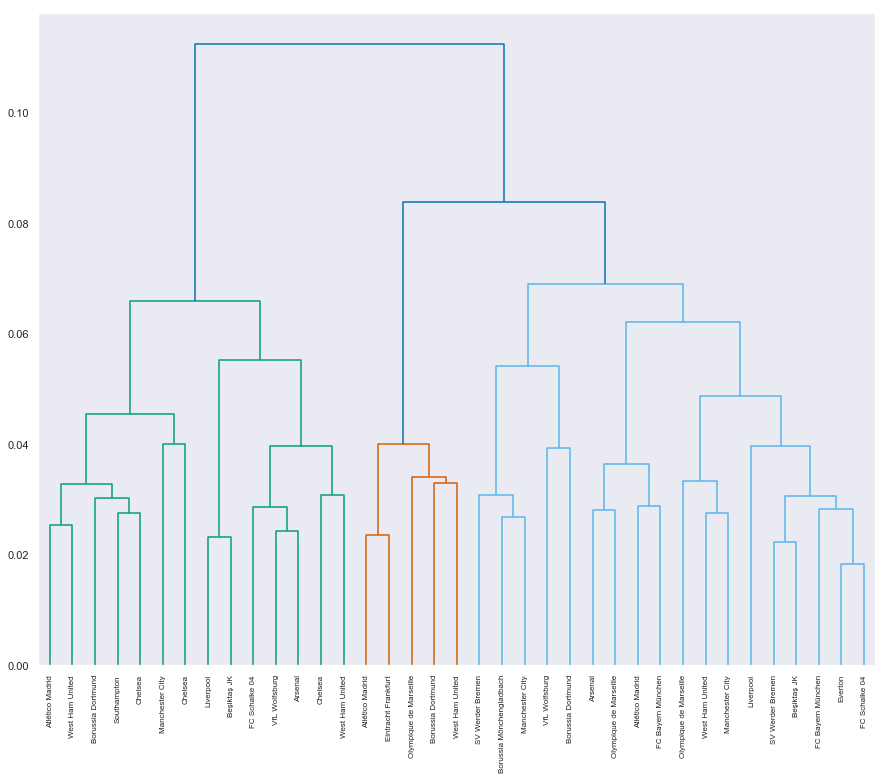

In [0]:
# Any Pre-processing needed?
#normalized_numeric = normalize(numeric_values)
#plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
#mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
#dendrogram(
#    mergings,
#    labels=club_labels,
#    leaf_rotation=90.,
#    leaf_font_size=8)


#plt.show()

In [0]:
#fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

International Reputation
Club                                                   
FC Barcelona                                       74.0
FC Bayern München                                  73.0
Chelsea                                            70.0
Manchester United                                  69.0
Manchester City                                    69.0
Real Madrid                                        69.0
Arsenal                                            67.0
Paris Saint-Germain                                67.0
Borussia Dortmund                                  66.0
Tottenham Hotspur                                  66.0
Liverpool                                          65.0
Juventus                                           63.0
Atlético Madrid                                    62.0
Milan                                              57.0
West Ham United                                    57.0
Napoli                                             54.0
FC Porto                                           53.0
Fenerbahçe SK                                      52.0
Roma                                               52.0
Inter                                              52.0
Beşiktaş JK                                        51.0
Lazio                                              51.0
Everton                                            51.0
Villarreal CF                                      50.0
AS Monaco                                          50.0
Sevilla FC                                         49.0
Valencia CF                                        48.0
Olympique de Marseille                             48.0
Borussia Mönchengladbach                           47.0
VfL Wolfsburg                                      47.0
Eintracht Frankfurt                                46.0
Ajax                                               46.0
FC Schalke 04                                      46.0
SV Werder Bremen                                   46.0
Leicester City                                     46.0
Sporting CP                                        46.0
Southampton                                        46.0
TSG 1899 Hoffenheim                                45.0
Stoke City                                         45.0
Crystal Palace                                     45.0
Wolverhampton Wanderers                            44.0
SL Benfica                                         44.0
Athletic Club de Bilbao                            44.0
Hertha BSC                                         43.0
Bayer 04 Leverkusen                                43.0
Medipol Başakşehir FK                              42.0
FC Augsburg                                        42.0
Galatasaray SK                                     42.0
Olympique Lyonnais                                 42.0
Newcastle United                                   41.0
...                                                 ...
VfR Aalen                                          24.0
Hobro IK                                           24.0
Śląsk Wrocław                                      24.0
Sandefjord Fotball                                 24.0
Os Belenenses                                      24.0
Oldham Athletic                                    24.0
Crawley Town                                       24.0
Ranheim Fotball                                    24.0
Cheltenham Town                                    24.0
Lillestrøm SK                                      24.0
SG Sonnenhof Großaspach                            24.0
Forest Green Rovers                                24.0
Carlisle United                                    24.0
SV Wehen Wiesbaden                                 24.0
La Berrichonne de Châteauroux                      24.0
IK Start                                           24.0
Strømsgodset IF                                    24.0
IFK Norrköping                                     24.0
GIF Sundsvall                                      23.0

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#position_group_labels = le.fit_transform(fifa.Position_Group)
#

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(predictors_scaled)

#Pass the player name from the dataset to the function and get 5 similar players as output
player_indices = recommendations.kneighbors(predictors_scaled)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def recommend_me(player):
    index = get_index(player)
    recommend_list = []
    for i in player_indices[index][1:]:
            recommend_list.append(fifa.iloc[i]['Name'])
    recommend_list.insert(0, player)
    return recommend_list

recommend_list = []
    #for i in player_indices2[index][1:]:
    #        recommend_list.append(fifa_subset.iloc[i]['Name'])
    #recommend_list.insert(0, player)
    
    #Get filtered df of recommended players
    recommended_df = predictors_subset.iloc[list(player_indices2[index][1:]),:]
    
    recommend_list = list(fifa_subset.iloc[list(player_indices2[index][1:]),:].ID)
    

standard_player = predictors[rador_variables][fifa.Name.isin(recommendation)]
standard_player = standard_player.set_index(pd.Index(fifa.Name[standard_player.index].values))
standard_player = standard_player.loc[recommendation,:]

# DBSCAN FOR OUTLIERS

In [572]:
#fifa_recom_valuez = fifa[fifa.ID.isin(recommend_list)][['Value','Wage', 'Release Clause', 'Overall']]

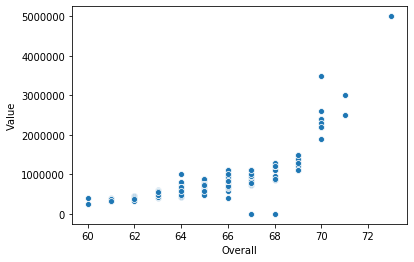

In [574]:
#sns.scatterplot('Overall', 'Value', data=fifa_recom_valuez)

In [615]:
#scaler = StandardScaler()
#scaled_values = scaler.fit_transform(fifa_recom_valuez.loc[:,['Value','Wage', 'Release Clause']])

In [655]:
#from sklearn.cluster import DBSCAN

#Apply DBSCAN to iris features
#dbsc = DBSCAN(eps = 0.8, min_samples = 2).fit(scaled_values)

#Get predicted labels
#labels = dbsc.labels_
#core_samples = np.zeros_like(labels, dtype = bool)
#core_samples[dbsc.core_sample_indices_] = True

In [656]:
#labels

array([-1,  0, -1,  0,  1,  1,  1, -1,  1, -1,  1, -1,  1,  2,  2,  2,  2,
        2, -1,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        2,  2,  4,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        5,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [676]:
#fifa_recom_valuez['Clusters'] = labels
#fifa_recom_valuez['Clusters'] = fifa_recom_valuez['Clusters'].astype('int')

In [677]:
#fifa_recom_valuez.Clusters.unique()

array([-1,  0,  1,  2,  3,  4,  5])

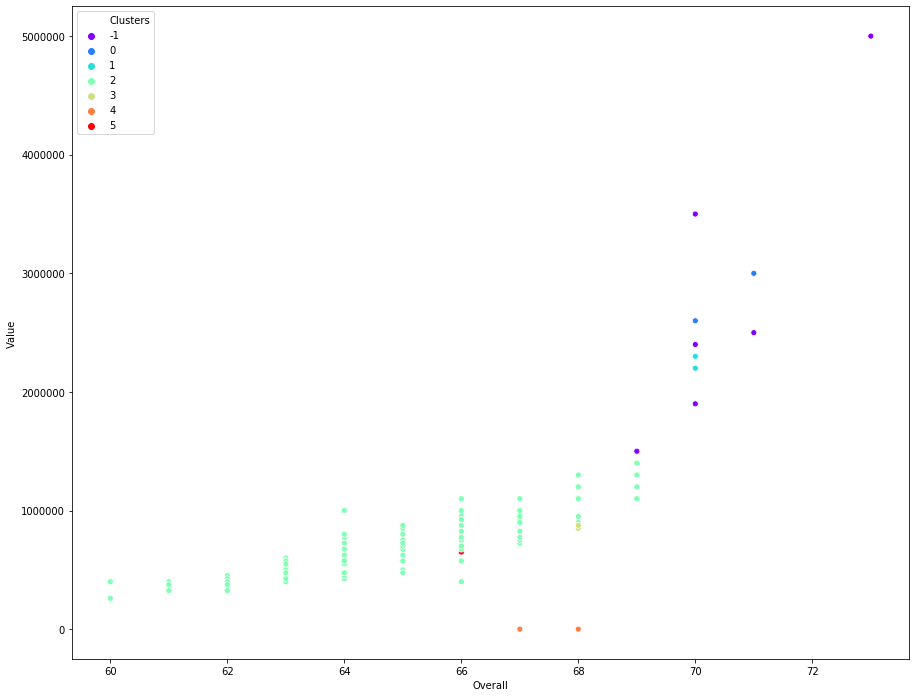

In [687]:
#plt.figure(figsize = (15,12))
#sns.scatterplot('Overall', 'Value', data=fifa_recom_valuez, hue = 'Clusters', palette='rainbow', legend = 'full')

In [690]:
#fifa_recom_valuez.groupby('Clusters').count()

Value  Wage  Release Clause  Overall
Clusters                                      
-1            8     8               8        8
 0            2     2               2        2
 1            6     6               6        6
 2          179   179             179      179
 3            2     2               2        2
 4            2     2               2        2
 5            2     2               2        2

In [653]:
#fifa_recom_valuez.groupby('Clusters').mean().sort_values(by = 'Value')

Value          Wage  Release Clause    Overall
Clusters                                                       
 4        0.000000e+00   6927.000000    0.000000e+00  67.500000
 2        7.454469e+05   3055.865922    1.220911e+06  65.117318
 5        8.250000e+05  12000.000000    0.000000e+00  66.500000
 3        8.625000e+05  12500.000000    1.700000e+06  68.000000
 1        2.283333e+06   7000.000000    3.900000e+06  70.000000
-1        2.359375e+06  10875.000000    4.887500e+06  69.625000
 0        2.800000e+06  13500.000000    5.300000e+06  70.500000